In [1]:
!pip install -q -q -q geopandas
!pip install -q -q -q contextily

In this notebook, we describe the sandbox analysis of spatial distribution of buildings.

In [85]:
import numpy as np
import pandas as pd

import geopandas as gpd

In [131]:
dep = gpd.read_file('contour-des-departements.json').to_crs('EPSG:2154')

<AxesSubplot:>

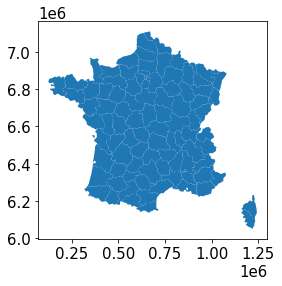

In [132]:
dep.plot()

In [86]:
liss = gpd.read_file('lissage.shp')

In [148]:
liss['Taux_50_100'] = pd.cut(np.minimum(-np.log2(liss.M_100) + np.log2(liss.M_50),2)  , [0,0.75, 1, 1.25, 1.5, 2])
liss['Taux_100_200'] = pd.cut(np.minimum(-np.log2(liss.M_200) + np.log2(liss.M_100),2)  , [0,0.75, 1, 1.25, 1.5, 2])
liss['Taux_200_400'] = pd.cut(np.minimum(-np.log2(liss.M_400) + np.log2(liss.M_200),2)  , [0,0.75, 1, 1.25, 1.5, 2])
liss['Taux_400_800'] = pd.cut(np.minimum(-np.log2(liss.M_800) + np.log2(liss.M_400),2)  , [0,0.75, 1, 1.25, 1.5, 2])

In [149]:
taux_50_100 = liss.dissolve('Taux_50_100', as_index=False)

In [150]:
taux_100_200 = liss.dissolve('Taux_100_200', as_index=False)

In [151]:
taux_200_400 = liss.dissolve('Taux_200_400', as_index=False)

In [152]:
taux_400_800 = liss.dissolve('Taux_400_800', as_index=False)

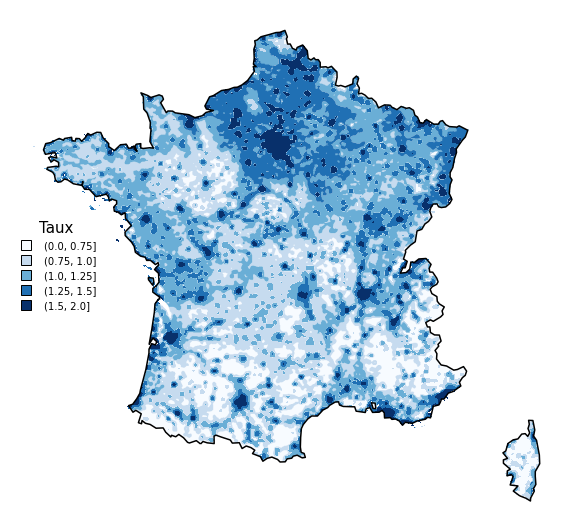

In [153]:
ax = taux_50_100.plot('Taux_50_100', cmap='Blues', legend=True, figsize=(10,10), legend_kwds={'loc': 'center left', 'fontsize' : 10, 'title': 'Taux', 'frameon':False})
ax.set_axis_off()
dep.dissolve().boundary.plot(color='black', ax=ax)
for legend_handle in ax.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    legend_handle._legmarker.set_marker('s')
    
plt.savefig('figure7_5_taux_50_100.pdf', format='pdf')

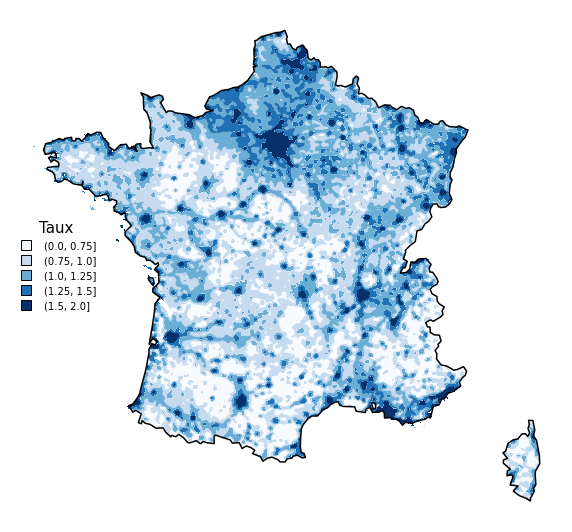

In [154]:
ax = taux_100_200.plot('Taux_100_200', cmap='Blues', legend=True, figsize=(10,10), legend_kwds={'loc': 'center left', 'fontsize' : 10, 'title': 'Taux', 'frameon':False})
ax.set_axis_off()
dep.dissolve().boundary.plot(color='black', ax=ax)
for legend_handle in ax.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    legend_handle._legmarker.set_marker('s')
    
plt.savefig('figure7_5_taux_100_200.pdf', format='pdf')

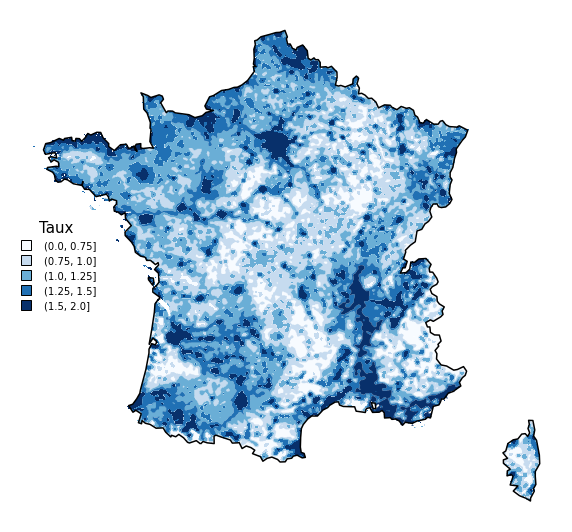

In [155]:
ax = taux_200_400.plot('Taux_200_400', cmap='Blues', legend=True, figsize=(10,10), legend_kwds={'loc': 'center left', 'fontsize' : 10, 'title': 'Taux', 'frameon':False})
ax.set_axis_off()
dep.dissolve().boundary.plot(color='black', ax=ax)
for legend_handle in ax.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    legend_handle._legmarker.set_marker('s')
    
plt.savefig('figure7_5_taux_200_400.pdf', format='pdf')

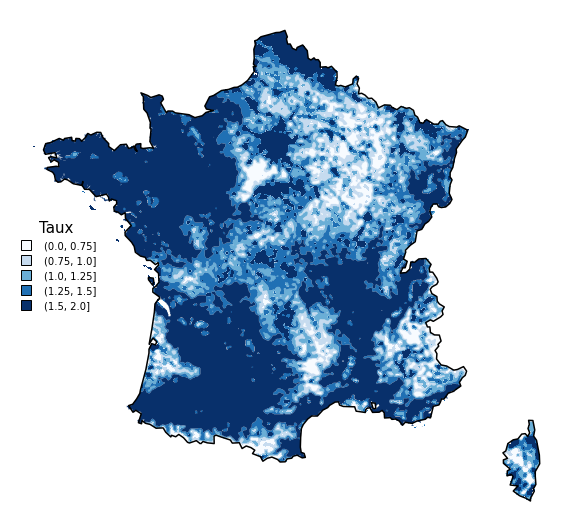

In [156]:
ax = taux_400_800.plot('Taux_400_800', cmap='Blues', legend=True, figsize=(10,10), legend_kwds={'loc': 'center left', 'fontsize' : 10, 'title': 'Taux', 'frameon':False})
ax.set_axis_off()
dep.dissolve().boundary.plot(color='black', ax=ax)
for legend_handle in ax.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    legend_handle._legmarker.set_marker('s')
    
plt.savefig('figure7_5_taux_400_800.pdf', format='pdf')

Load the built-up areas

In [2]:
bocage = pd.read_csv('bocage_ign_2012.csv')
openfield = pd.read_csv('openfield_ign_2012.csv')

Display the two spatial distributions of building :

In [3]:
s_bocage = gpd.GeoDataFrame(bocage, geometry=gpd.points_from_xy(bocage.x, bocage.y), crs='EPSG:2154')
s_openfield = gpd.GeoDataFrame(openfield, geometry=gpd.points_from_xy(openfield.x, openfield.y), crs='EPSG:2154')

NameError: name 'ctx' is not defined

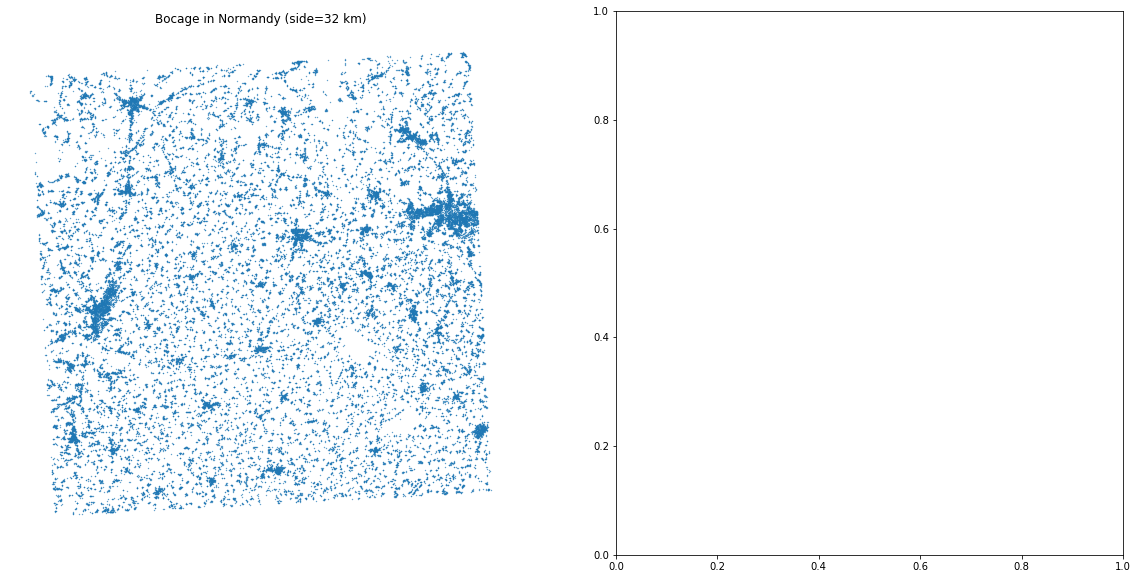

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
s_bocage.to_crs(epsg=3857).plot(ax=ax1, markersize=0.1)
ax1.axis(False)
ax1.set_title('Bocage in Normandy (side=32 km)')
ctx.add_basemap(ax1)
s_openfield.to_crs(epsg=3857).plot(ax=ax2, markersize=0.1)
ax2.axis(False)
ax2.set_title('Openfield in East of France (side=32 km)')
ctx.add_basemap(ax2)

First of all, we have to calculate the neigbhors near each building for several radius.

In [5]:
def neighbors_near_point(df, list_of_radius):
    neighbors = np.zeros([df.shape[0],list_of_radius.size],dtype=np.float)
    for i, r in enumerate(list_of_radius):
        tree = KDTree(df[['x', 'y']]) 
        neighbors[:,i] = tree.query_radius(df[['x', 'y']], r= r, count_only=True)
    result = pd.DataFrame(neighbors)
    result.columns = [str(t) for t in list_of_radius]
    return(result)

In [6]:
radius_range = np.array([50, 100, 200, 400, 800])
bocage_neighbor = neighbors_near_point(bocage, radius_range)
openfield_neighbor = neighbors_near_point(openfield, radius_range)

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_2620/1271688115.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  neighbors = np.zeros([df.shape[0],list_of_radius.size],dtype=np.float)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_2620/1271688115.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  neighbors = np.zeros([df.shape[

Now, we can compute the generalized dimensions.

In [7]:
def entropy(neighbor,q):
    if q!=1:
        return(np.log2(np.sum(neighbor**(q-1)))/(q-1))
    else:
        return(np.sum(np.log2(neighbor)) /neighbor.shape[0] )

def scale_function(neighbor, list_of_q):
    resultat = []
    for q in list_of_q:
        resultat.append(entropy(neighbor, q))   
    result = pd.concat(resultat, axis=1)
    result = result.transpose()
    result['q'] = list_of_q
    return(result)

In [8]:
bocage_neighbor

,50,100,200,400,800
0,2.0,3.0,4.0,8.0,94.0
1,1.0,1.0,8.0,24.0,105.0
2,4.0,9.0,12.0,38.0,73.0
3,4.0,8.0,25.0,55.0,109.0
4,9.0,31.0,108.0,335.0,969.0
...,...,...,...,...,...
52171,6.0,21.0,68.0,201.0,769.0
52172,6.0,24.0,84.0,142.0,211.0
52173,3.0,14.0,56.0,127.0,191.0
52174,3.0,12.0,42.0,82.0,204.0


First, we calculate the generalized dimension for the scale range (radius) 50 - 800 m

In [9]:
list_of_radius = np.array([50, 100,  200, 400, 800])

In [10]:
bocage_scaling = scale_function(bocage_neighbor, np.arange(-5,5.5,0.5))
bocage_scaling['Dq'] = bocage_scaling[list_of_radius.astype(str)].apply(lambda x :LinearRegression().fit(np.log2(list_of_radius).reshape(list_of_radius.size,1), x).coef_[0] , axis=1 )  
openfield_scaling = scale_function(openfield_neighbor, np.arange(-5,5.5,0.5))
openfield_scaling['Dq'] = openfield_scaling[list_of_radius.astype(str)].apply(lambda x :LinearRegression().fit(np.log2(list_of_radius).reshape(list_of_radius.size,1), x).coef_[0] , axis=1 )  

In [11]:
bocage_scaling[bocage_scaling.q==0] 

,50,100,200,400,800,q,Dq
10,-14.169293,-13.14049,-12.19552,-10.86131,-8.982575,0.0,1.265262


In [12]:
openfield_scaling[openfield_scaling.q==0] 

,50,100,200,400,800,q,Dq
10,-13.07839,-11.750958,-10.559997,-9.399287,-8.122739,0.0,1.226297


In [13]:
openfield_scaling = openfield_scaling[openfield_scaling.q==0] [['50', '100', '200', '400', '800']].values.flatten()
bocage_scaling = bocage_scaling[bocage_scaling.q==0] [['50', '100', '200', '400', '800']].values.flatten()
bocage_scaling = pd.DataFrame({'radius':list_of_radius, 'Iq' : bocage_scaling, 'configuration':'Bocage'})
openfield_scaling = pd.DataFrame({'radius':list_of_radius, 'Iq' : openfield_scaling, 'configuration':'Openfield'})

In [14]:
scaling = pd.concat([bocage_scaling, openfield_scaling])

In [15]:
openfield_scaling['Eq'] = np.exp(openfield_scaling.Iq)
bocage_scaling['Eq'] = np.exp(bocage_scaling.Iq)

In [16]:
d = np.polyfit(np.log(openfield_scaling['radius']),openfield_scaling['Iq'],1)
f = np.poly1d(d)
openfield_scaling['line'] = np.exp(f(np.log(openfield_scaling['radius'])))

d = np.polyfit(np.log(bocage_scaling['radius']),bocage_scaling['Iq'],1)
f = np.poly1d(d)
bocage_scaling['line'] = np.exp(f(np.log(bocage_scaling['radius'])))

In [ ]:
bocage

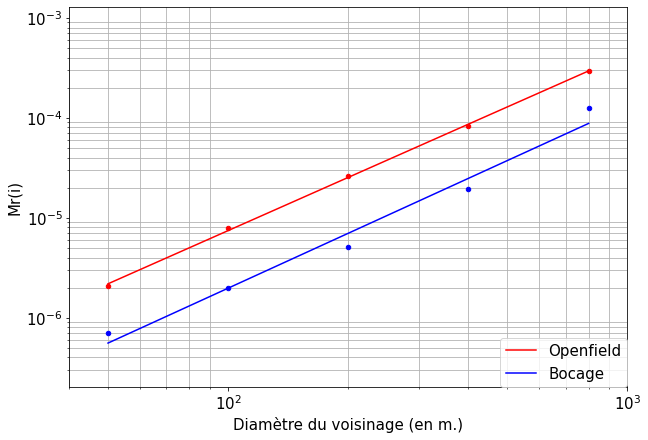

In [82]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.rcParams['axes.axisbelow'] = True

ax = openfield_scaling.plot.scatter('radius','Eq', loglog=True, figsize=(10,7), c='red')
bocage_scaling.plot.scatter('radius','Eq', loglog=True, figsize=(10,7), c='blue', ax=ax)
ax.set_xlim((40,1000))
ax.set_ylim((bocage_scaling.Eq.min()-0.0000005, openfield_scaling.Eq.max()+0.001))
plt.grid(which='both')
openfield_scaling.plot.line('radius', 'line',color='Red',ax=ax, legend=False, label='Openfield')
bocage_scaling.plot.line('radius', 'line',color='blue',ax=ax, legend=False, label ='Bocage')
ax.set_xlabel('Diamètre du voisinage (en m.)')
ax.set_ylabel('Mr(i)')
plt.legend( loc='lower right', borderaxespad=0.)
plt.savefig('figure7_2.pdf', format='pdf')

In [64]:
fd = (np.log(bocage_scaling.Eq[1:]).to_numpy() - np.log(bocage_scaling.Eq[:4]).to_numpy()) 
fd_bocage = pd.DataFrame({'Taux de Variation': fd, 'échelle': ['50-100', '100-200', '200-400', '400-800']})
fd_bocage['territoire'] = 'Bocage'
fd = (np.log(openfield_scaling.Eq[1:]).to_numpy() - np.log(openfield_scaling.Eq[:4]).to_numpy()) 
fd_openfield = pd.DataFrame({'Taux de Variation': fd, 'échelle': ['50-100', '100-200', '200-400', '400-800']})
fd_openfield['territoire'] = 'Openfield'
fd = pd.concat([fd_bocage,fd_openfield])

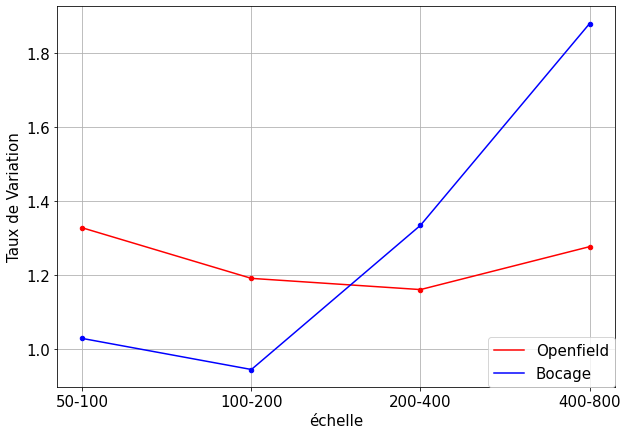

In [83]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}



matplotlib.rc('font', **font)
ax = fd_openfield.plot.scatter('échelle','Taux de Variation', figsize=(10,7), c='red')
fd_bocage.plot.scatter('échelle','Taux de Variation', c='blue', ax=ax)

fd_openfield.plot.line('échelle','Taux de Variation',ax=ax, legend=False, label='Openfield', color='red')
fd_bocage.plot.line('échelle','Taux de Variation',color='blue',ax=ax, legend=False, label ='Bocage')
plt.legend( loc='lower right', borderaxespad=0.)
plt.grid(which='both')
plt.savefig('figure7_4.pdf', format='pdf')

Text(0.5, 1.0, 'Generalized Dimensions of openfield distribution [ 50 100 200 400 800]')

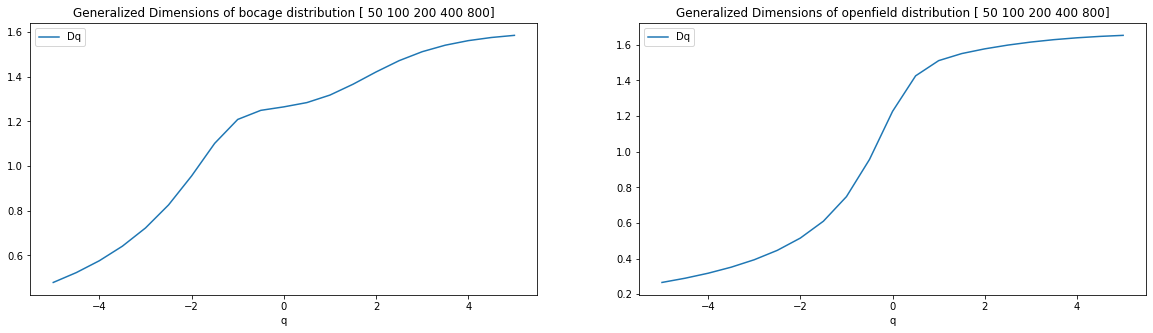

In [251]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
bocage_scaling.plot(x='q', y='Dq', ax=ax1)
ax1.set_title('Generalized Dimensions of bocage distribution ' + np.array2string(list_of_radius))
openfield_scaling.plot(x='q', y='Dq', ax=ax2)
ax2.set_title('Generalized Dimensions of openfield distribution ' + np.array2string(list_of_radius))

As we can see, on this scale range, the generalized dimensions is increasing that is inconsistent with multifractal theory. On broader scales (400 - 3200 m), we find results more in line with the theory.

In [252]:
list_of_radius = np.array([400, 800, 1600, 3200])

In [253]:
bocage_scaling = scale_function(bocage_neighbor, np.arange(-5,5.5,0.5))
bocage_scaling['Dq'] = bocage_scaling[list_of_radius.astype(str)].apply(lambda x :LinearRegression().fit(np.log2(list_of_radius).reshape(list_of_radius.size,1), x).coef_[0] , axis=1 )  
openfield_scaling = scale_function(openfield_neighbor, np.arange(-5,5.5,0.5))
openfield_scaling['Dq'] = openfield_scaling[list_of_radius.astype(str)].apply(lambda x :LinearRegression().fit(np.log2(list_of_radius).reshape(list_of_radius.size,1), x).coef_[0] , axis=1 )  

Text(0.5, 1.0, 'Generalized Dimensions of openfield distribution [ 400  800 1600 3200]')

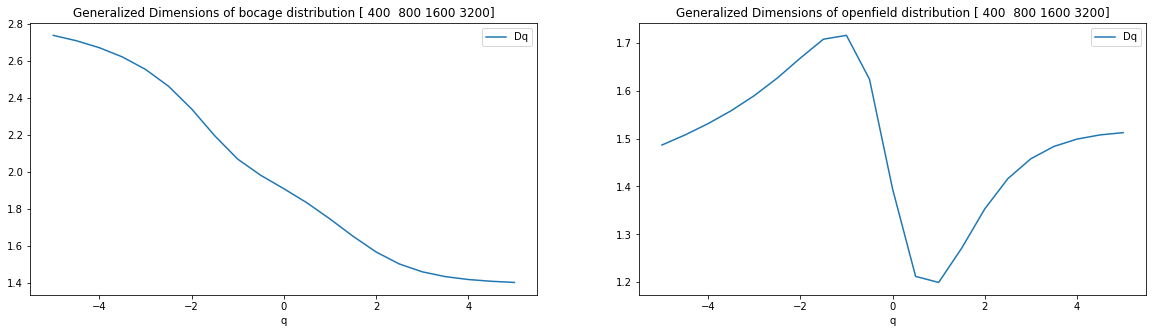

In [254]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
bocage_scaling.plot(x='q', y='Dq', ax=ax1)
ax1.set_title('Generalized Dimensions of bocage distribution ' + np.array2string(list_of_radius))
openfield_scaling.plot(x='q', y='Dq', ax=ax2)
ax2.set_title('Generalized Dimensions of openfield distribution ' + np.array2string(list_of_radius))